In [19]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV

In [20]:
df=pd.read_csv("/content/drive/MyDrive/demonetization-tweets.csv")
# Data Source---https://www.kaggle.com/arathee2/demonetization-in-india-twitter-data

In [21]:
df.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,23-11-2016 18.40,False,NaN,8.010000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,23-11-2016 18.40,False,NaN,8.010000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,23-11-2016 18.40,False,NaN,8.010000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,23-11-2016 18.39,False,NaN,8.010000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,23-11-2016 18.39,False,NaN,8.010000e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [22]:
df.shape

(14940, 16)

In [24]:
df.columns

Index(['Unnamed: 0', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     14940 non-null  int64  
 1   X              14940 non-null  int64  
 2   text           14940 non-null  object 
 3   favorited      14940 non-null  bool   
 4   favoriteCount  14940 non-null  int64  
 5   replyToSN      1102 non-null   object 
 6   created        14940 non-null  object 
 7   truncated      14940 non-null  bool   
 8   replyToSID     886 non-null    float64
 9   id             14940 non-null  float64
 10  replyToUID     1102 non-null   float64
 11  statusSource   14940 non-null  object 
 12  screenName     14940 non-null  object 
 13  retweetCount   14940 non-null  int64  
 14  isRetweet      14940 non-null  bool   
 15  retweeted      14940 non-null  bool   
dtypes: bool(4), float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [25]:
df.isna().sum()

Unnamed: 0           0
X                    0
text                 0
favorited            0
favoriteCount        0
replyToSN        13838
created              0
truncated            0
replyToSID       14054
id                   0
replyToUID       13838
statusSource         0
screenName           0
retweetCount         0
isRetweet            0
retweeted            0
dtype: int64

In [26]:
df.describe()

,Unnamed: 0,X,favoriteCount,replyToSID,id,replyToUID,retweetCount
count,14940.000000,14940.000000,14940.000000,8.860000e+02,1.494000e+04,1.102000e+03,14940.000000
mean,7470.500000,7470.500000,1.071486,8.383025e+17,8.254268e+17,4.303630e+16,223.770147
std,4312.950846,4312.950846,28.756361,3.884175e+16,2.623583e+16,1.797181e+17,411.793864
min,1.000000,1.000000,0.000000,2.209633e+10,8.010000e+17,1.917731e+06,0.000000
25%,3735.750000,3735.750000,0.000000,8.010000e+17,8.010000e+17,3.914920e+07,1.000000
50%,7470.500000,7470.500000,0.000000,8.530000e+17,8.010000e+17,1.457888e+08,40.000000
75%,11205.250000,11205.250000,0.000000,8.540000e+17,8.540000e+17,1.480227e+09,197.000000
max,14940.000000,14940.000000,3166.000000,8.550000e+17,8.550000e+17,8.540000e+17,5170.000000


In [ ]:
#tweets['replyToSN']=tweets['replyToSN'].fillna('ArvindKejriwal')
df['replyToSID']=df['replyToSID'].fillna(8.010887e+17)
df['replyToUID']=df['replyToUID'].fillna(4.303630e+16)

In [27]:
df.isna().sum()

Unnamed: 0           0
X                    0
text                 0
favorited            0
favoriteCount        0
replyToSN        13838
created              0
truncated            0
replyToSID       14054
id                   0
replyToUID       13838
statusSource         0
screenName           0
retweetCount         0
isRetweet            0
retweeted            0
dtype: int64

In [28]:
from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

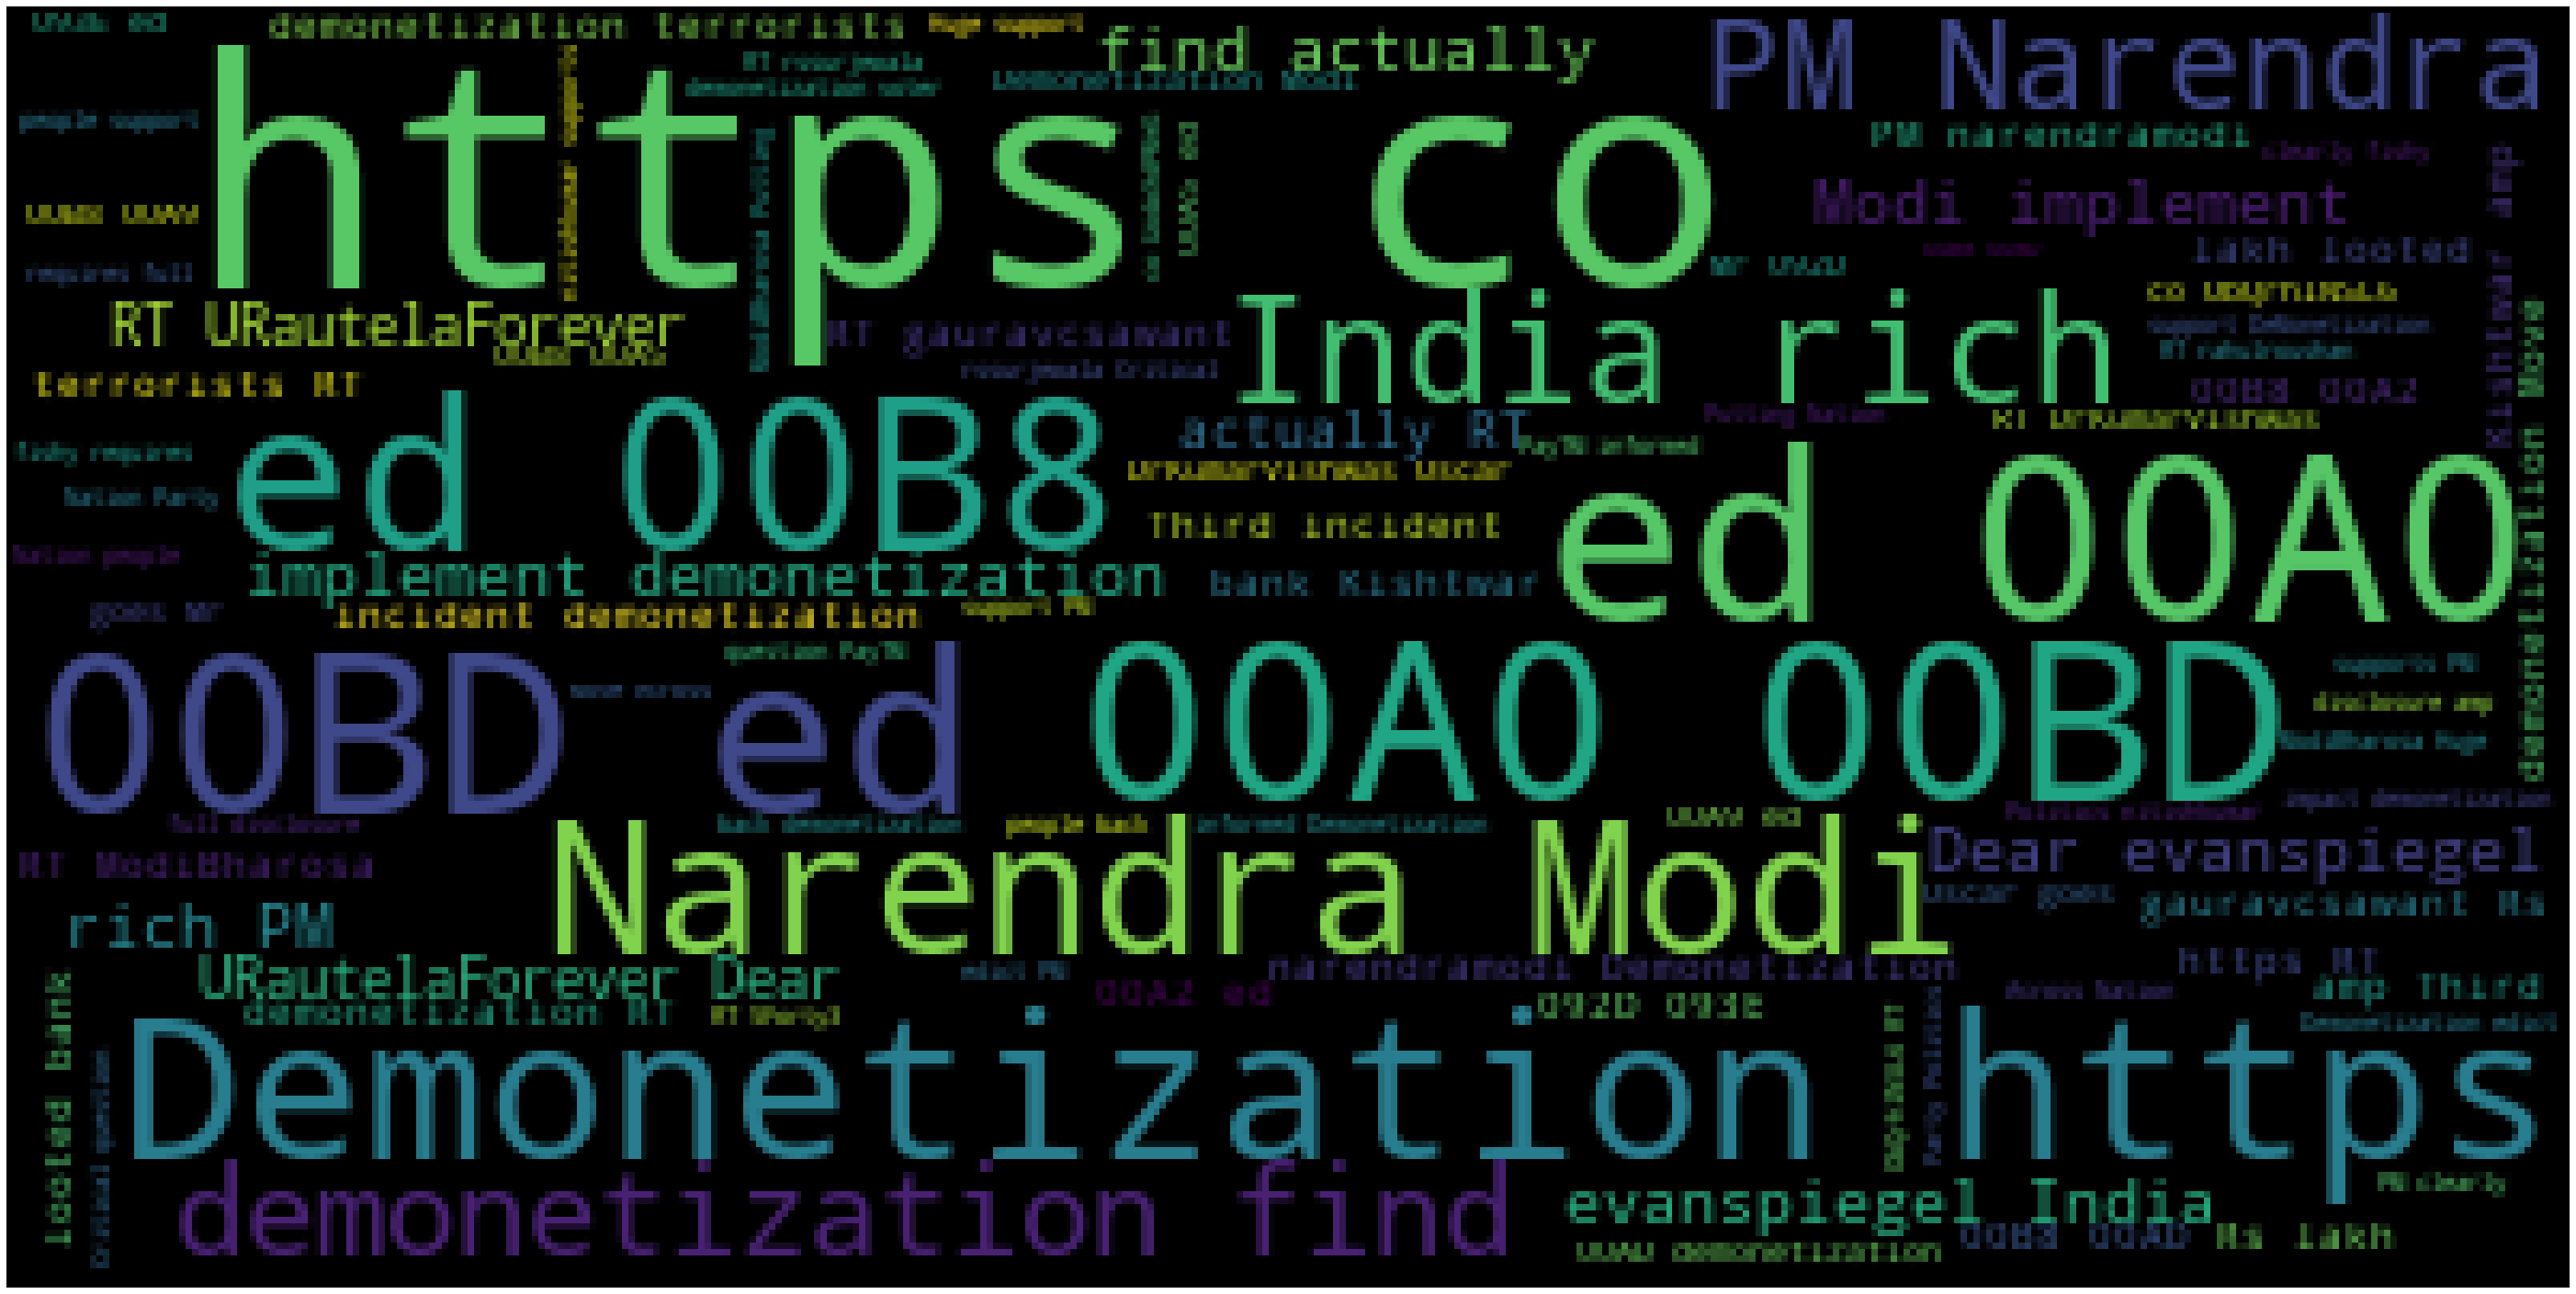

In [29]:
wc(df['text'],'black','Common Words' )

Sentiment Intensity Analyzer function

In [30]:
import nltk
nltk.download('vader_lexicon')
  
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
analyzer.polarity_scores(df.text[1])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [31]:
df['sentiment_compound_polarity']=df.text.apply(lambda x:analyzer.polarity_scores(x)['compound'])#extract compound score
df['sentiment_neutral']=df.text.apply(lambda x:analyzer.polarity_scores(x)['neu'])#extract neutral score
df['sentiment_negative']=df.text.apply(lambda x:analyzer.polarity_scores(x)['neg'])#extract negative score
df['sentiment_pos']=df.text.apply(lambda x:analyzer.polarity_scores(x)['pos'])#extract positive score
df['sentiment_type']='' #initialize sentiment_type column
df.loc[df.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
df.loc[df.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
df.loc[df.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
df.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,23-11-2016 18.40,False,NaN,8.010000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,0.1027,0.783,0.1,0.117,POSITIVE
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,23-11-2016 18.40,False,NaN,8.010000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,23-11-2016 18.40,False,NaN,8.010000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,23-11-2016 18.39,False,NaN,8.010000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,23-11-2016 18.39,False,NaN,8.010000e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,0.0000,1.000,0.0,0.000,NEUTRAL


Comparison of postive, negative and neutral tweets by a Bar plot

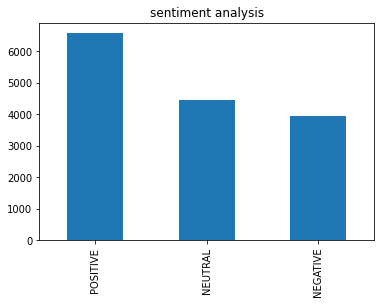

In [32]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

Distrtibution of all categories of tweets

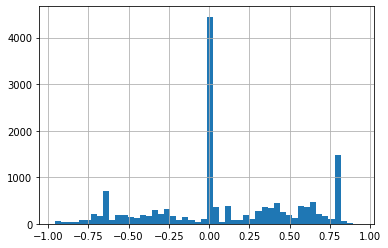

In [33]:
df.sentiment_compound_polarity.hist(bins=50)

Analysis of Positive tweets

In [ ]:
df[["screenName","text","sentiment_compound_polarity"]][df.sentiment_compound_polarity>0]

,screenName,text,sentiment_compound_polarity
0,HASHTAGFARZIWAL,RT @rssurjewala: Critical question: Was PayTM ...,0.1027
7,KARUNASHANKEROJ,RT @Joydeep_911: Calling all Nationalists to j...,0.3818
8,sumitbhati2002,RT @sumitbhati2002: Many opposition leaders ar...,0.7003
10,sumitbhati2002,Many opposition leaders are with @narendramodi...,0.8176
11,MonishGavand,RT @Joydas: Question in Narendra Modi App wher...,0.4019
...,...,...,...
14925,Mridul_Sharma1,@moneycontrolcom Who wrote this article? You g...,0.3818
14931,Saquibanwargift,RT @bharat_builder: Lol. Demonetization has fi...,0.7964
14937,pavan_sethi,RT @bharat_builder: Lol. Demonetization has fi...,0.7964
14938,Stupidosaur,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,0.5499


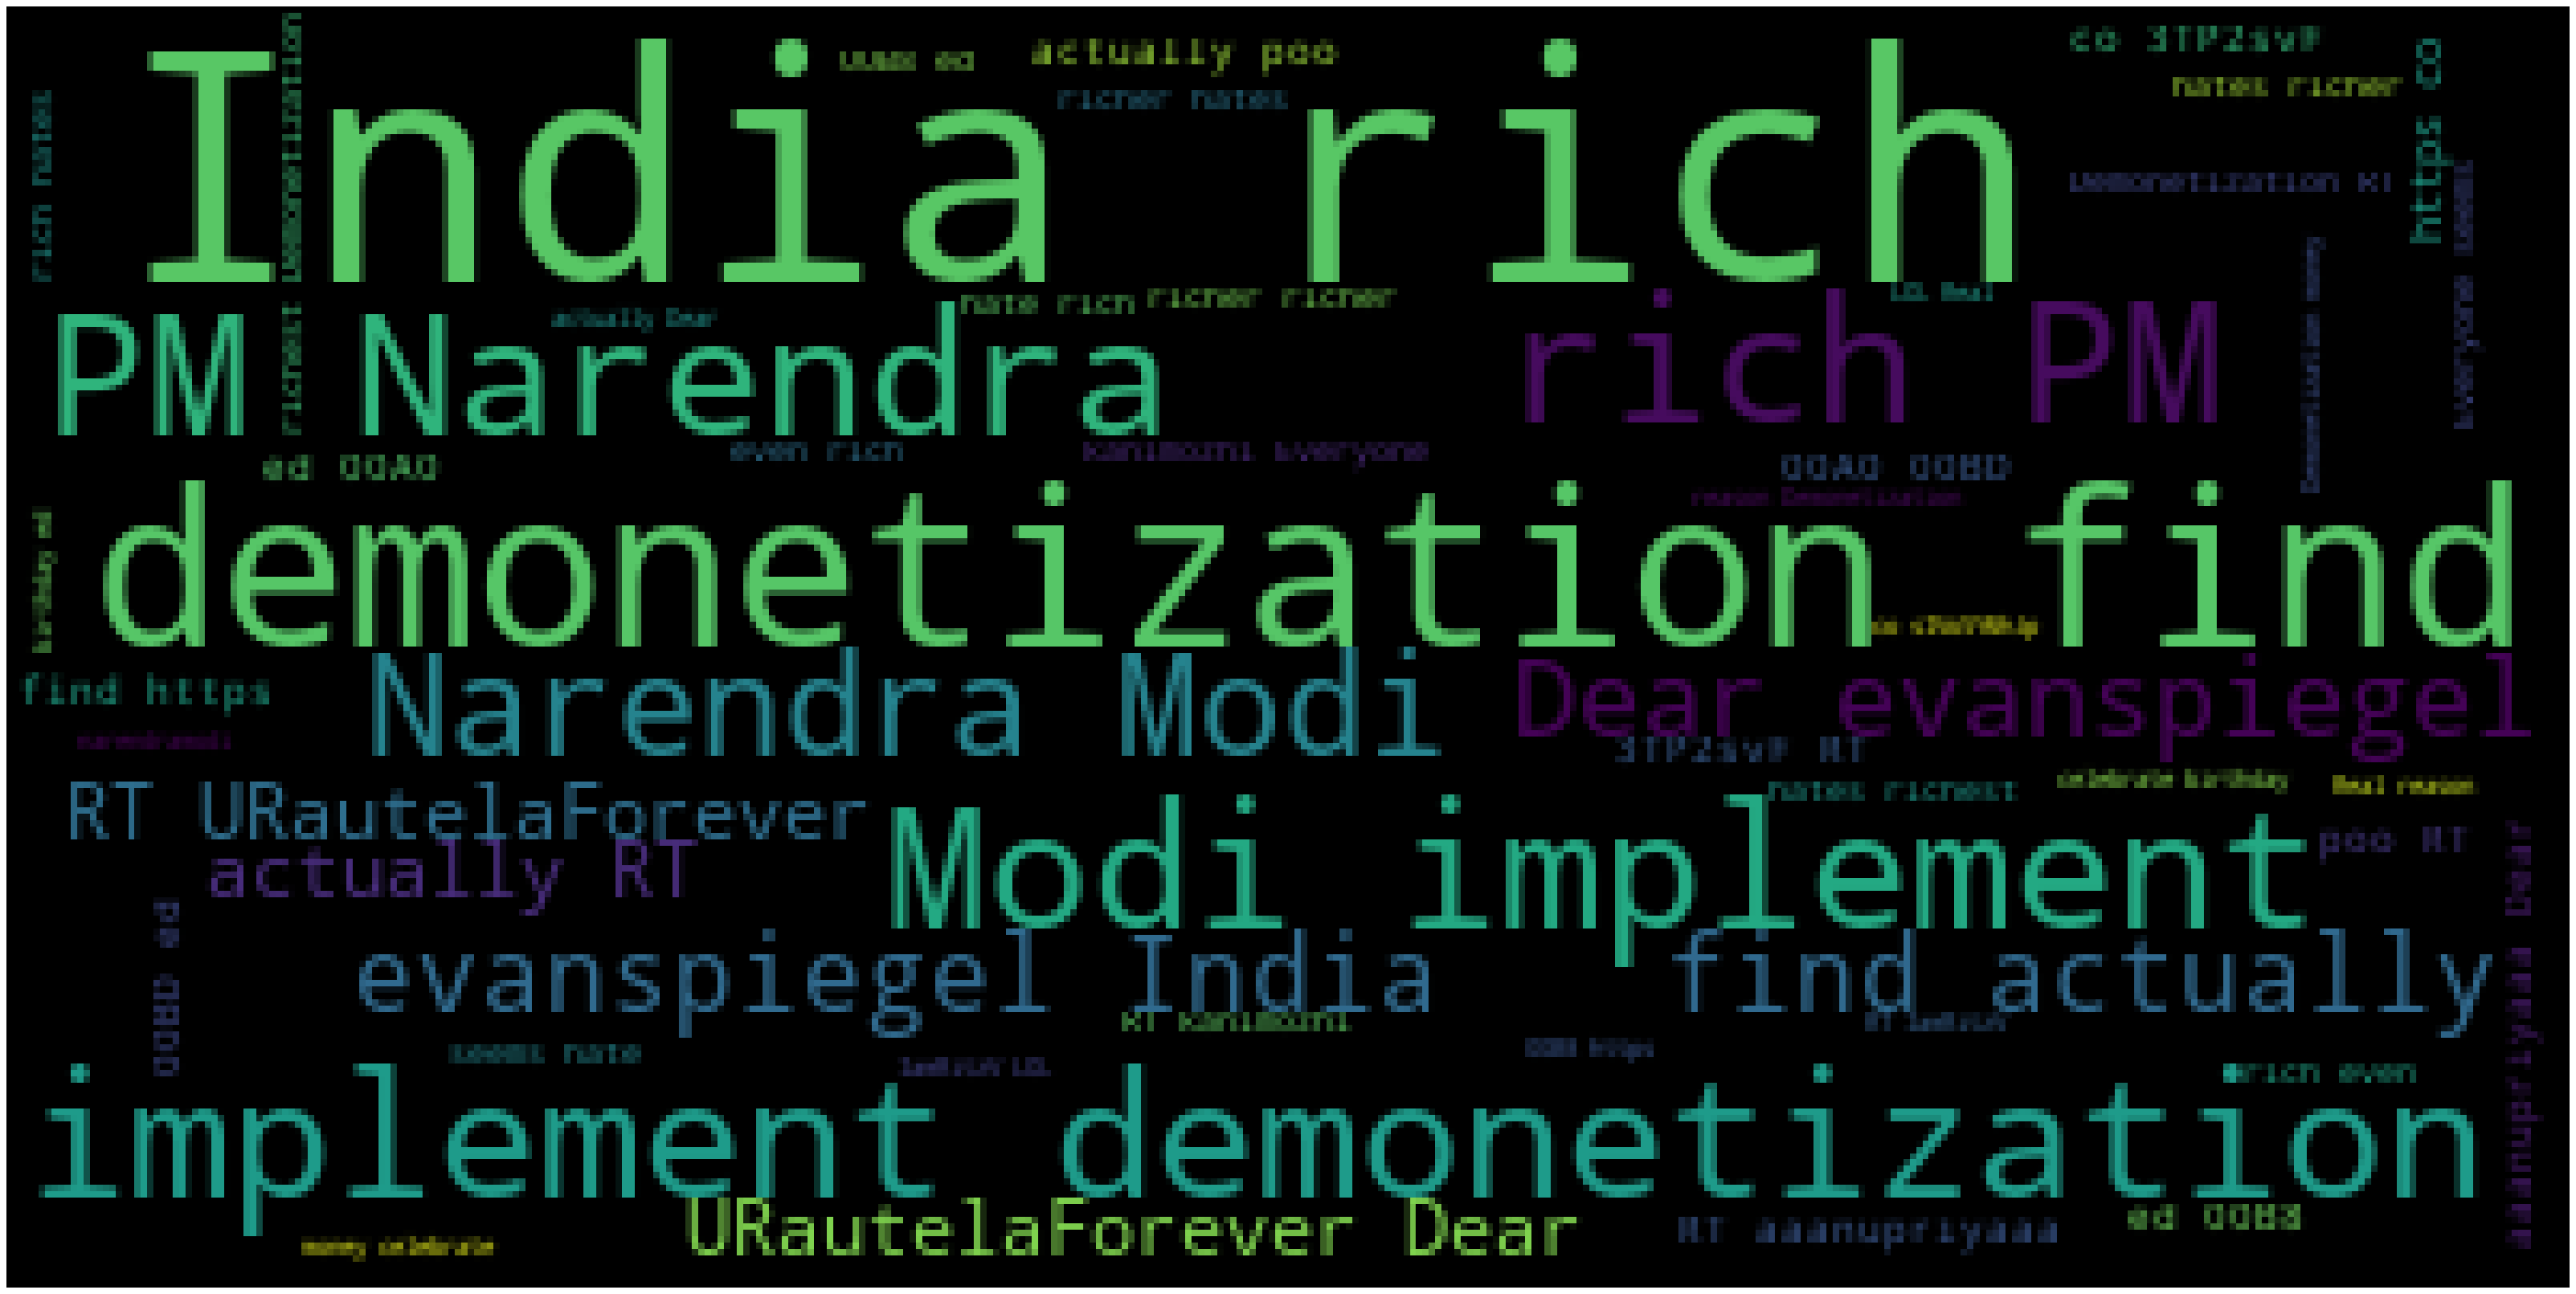

In [ ]:
wc(df.text[df.sentiment_compound_polarity > 0.8],'black','Common Words')

Analysis of Negative tweets

In [34]:
df[["screenName","text","sentiment_compound_polarity"]][df.sentiment_compound_polarity<0]

,screenName,text,sentiment_compound_polarity
6,bhodia1,RT @gauravcsawant: Rs 40 lakh looted from a ba...,-0.6249
9,HelpIndia2016,National reform now destroyed even the essence...,-0.2023
12,yuvaraj_karki,@Jaggesh2 Bharat band on 28??<ed><U+00A0><U+00...,-0.1179
15,aazaadparinda,RT @Dipankar_cpiml: The Modi app on #DeMonetiz...,-0.6997
26,mrx565,RT @kapil_kausik: #Doltiwal I mean #JaiChandKe...,-0.6940
...,...,...,...
14932,JustinSandefur,Can cash -- or the end of cash -- end poverty ...,-0.5106
14933,Reaganite8,@thehill To The Hill. Shame on you for your an...,-0.0516
14934,SukhvinderShahi,RT @Vidyut: How India became Bill Gates' guine...,-0.5267
14935,MuzzammilAap,RT @saxenavishakha: Ghost of demonetization re...,-0.3182


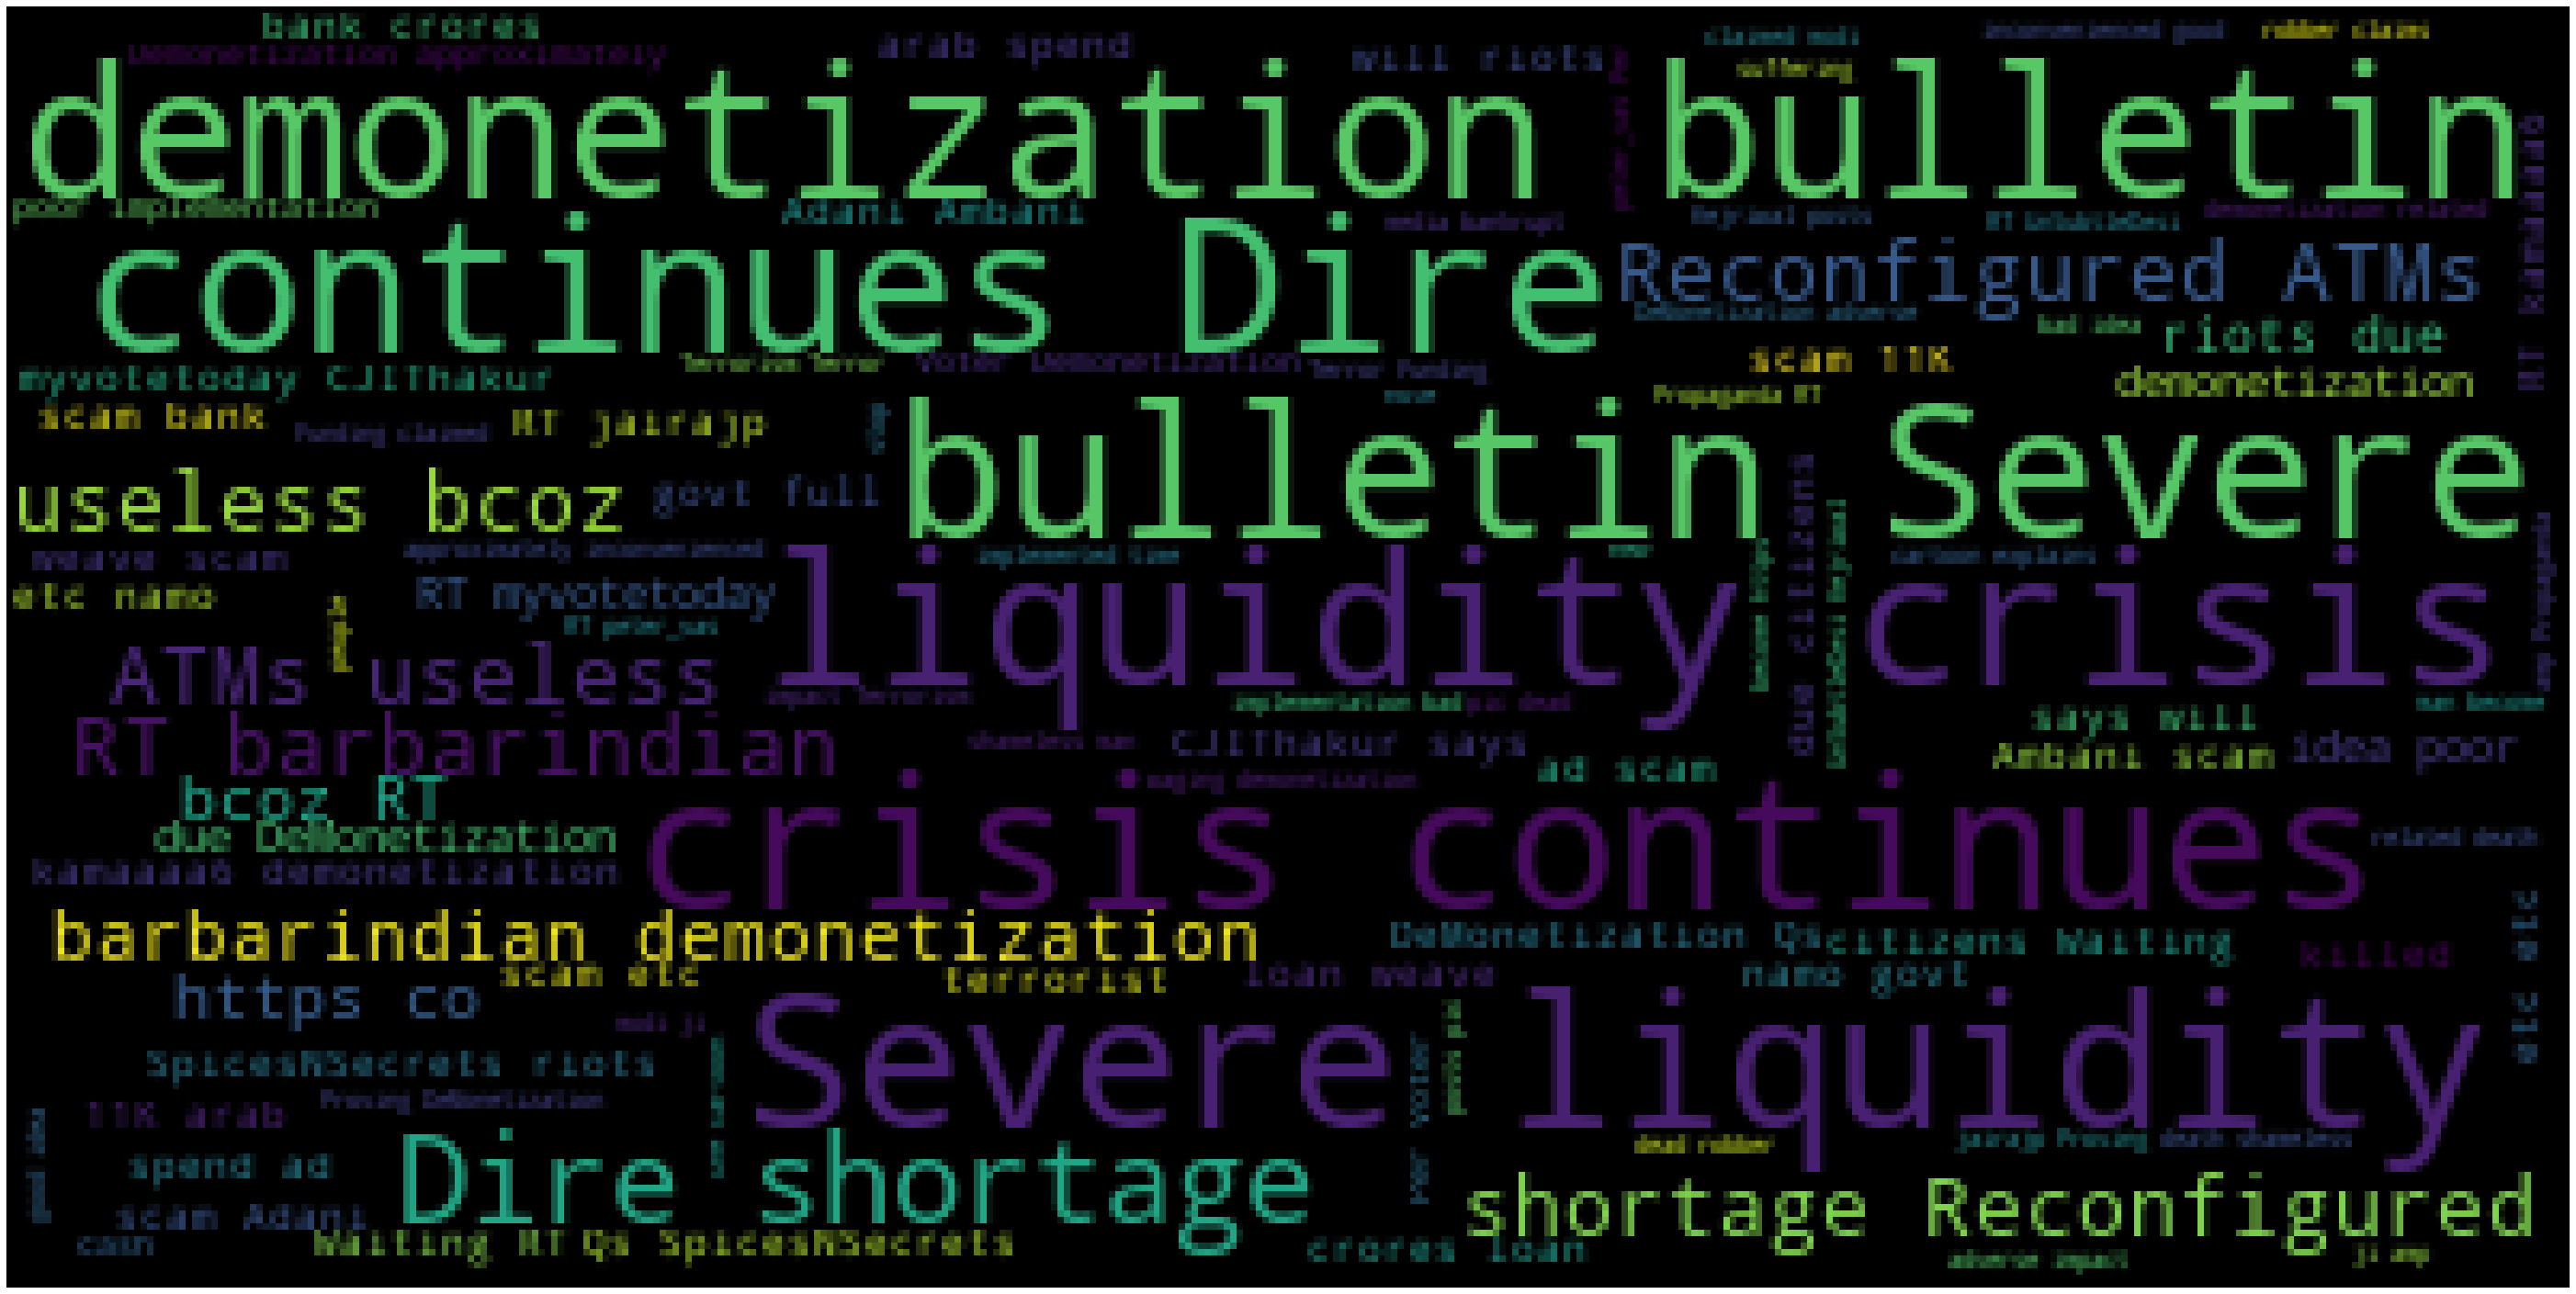

In [ ]:
wc(df.text[df.sentiment_compound_polarity <-0.8],'black','Common Words')

Analysis of Neutral tweets

In [ ]:
df[["screenName","text","sentiment_compound_polarity"]][df.sentiment_compound_polarity==0]

,screenName,text,sentiment_compound_polarity
1,PRAMODKAUSHIK9,RT @Hemant_80: Did you vote on #Demonetization...,0.0
2,rahulja13034944,"RT @roshankar: Former FinSec, RBI Dy Governor,...",0.0
3,deeptiyvd,RT @ANI_news: Gurugram (Haryana): Post office ...,0.0
4,CPIMBadli,RT @satishacharya: Reddy Wedding! @mail_today ...,0.0
5,ambazaarmag,@DerekScissors1: India’s #demonetization: #Bla...,0.0
...,...,...,...
14899,rohithshetty,RT @geetv79: How Demonetization Helped Govt Fo...,0.0
14903,pononline,@i_AjayGopi Agricultre means only water?? What...,0.0
14904,ln_anderson,RT @JPAL_Global: This Thursday: J-PAL co-found...,0.0
14909,SpencerKarter,"If it wasn't for #YouTuber #PhilipDeFranco, I ...",0.0


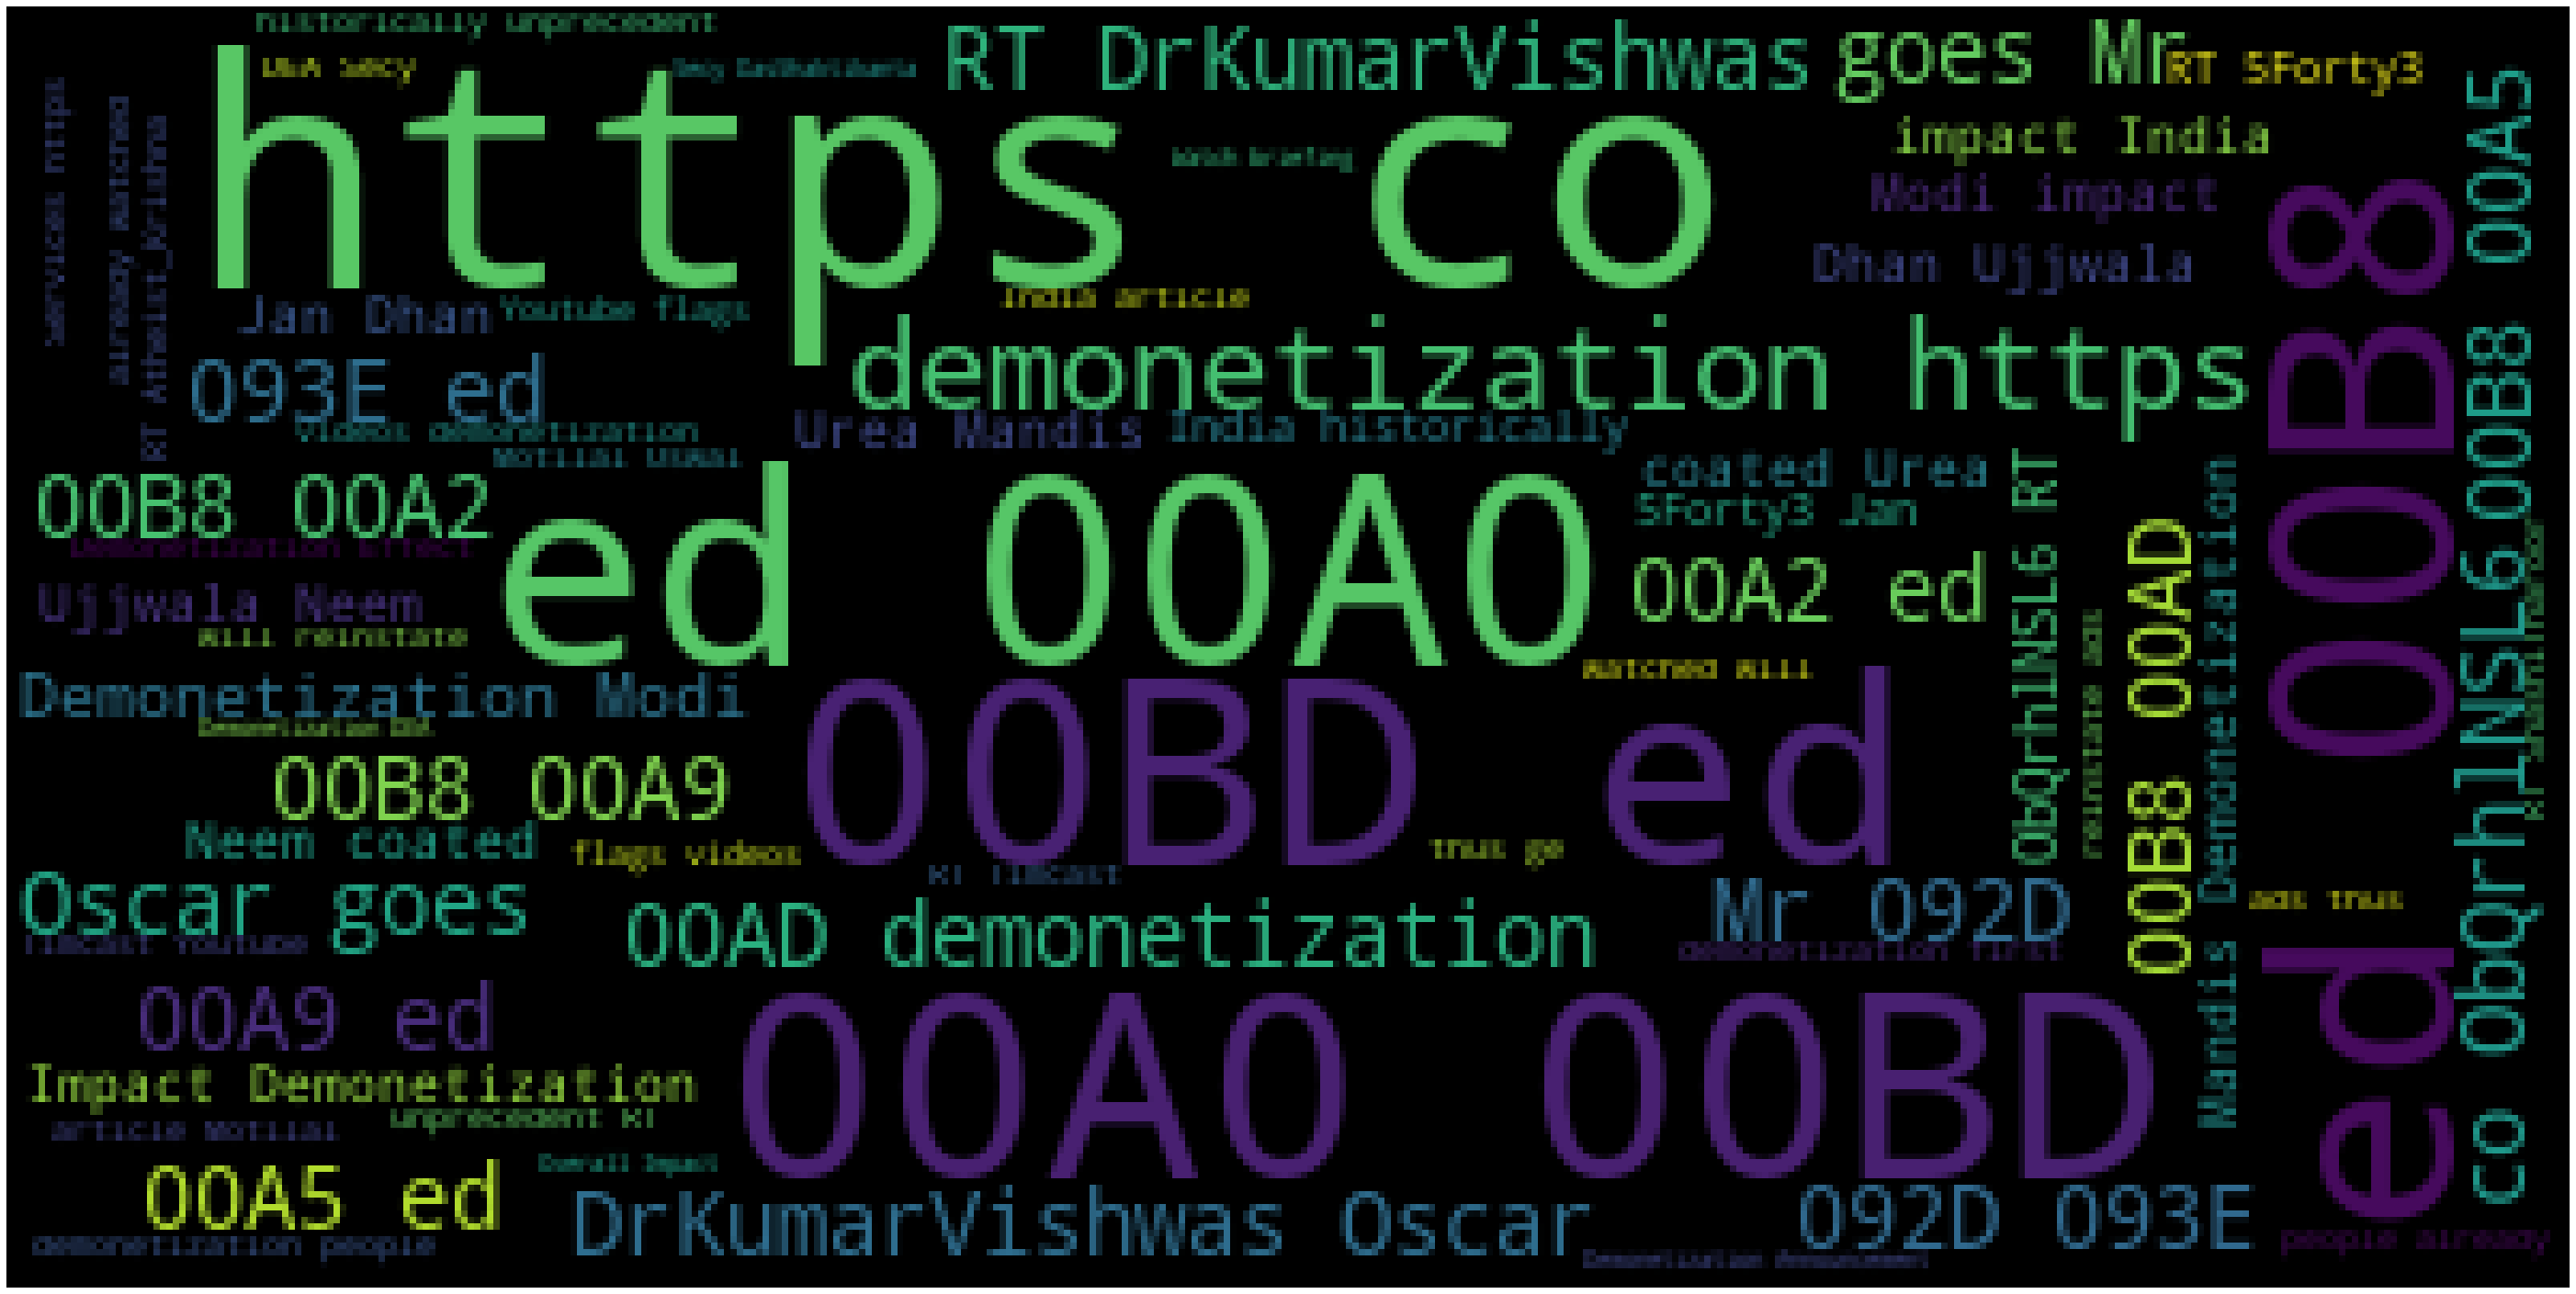

In [ ]:
wc(df.text[df.sentiment_compound_polarity ==0],'black','Common Words')

In [ ]:
df.screenName.value_counts(sort=True, ascending=False).head(10)


Stupidosaur      47
mituamin         20
dhruvbhim        20
gauravcam        19
DipendraDipzo    19
AmiKanu          18
monk_razr        17
ChweeneyTodd     17
MarathaBaan      16
chacha_ninja     16
Name: screenName, dtype: int64

In [ ]:
df[['screenName','sentiment_compound_polarity']].groupby('screenName').sum().sort_values(by=['sentiment_compound_polarity'])

,sentiment_compound_polarity
screenName,
Stupidosaur,-5.2270
A_Observr,-4.0095
anilkohli54,-3.6254
jairajp,-3.1812
LivingOnChi,-3.0735
...,...
dhruvbhim,3.4690
Srianuragh,3.7703
ibhagwa_n,3.8596


Top 10 tweeters who tweeted most Positive tweets

In [ ]:
df[['screenName','sentiment_compound_polarity']].groupby('screenName').sum().sort_values(by=['sentiment_compound_polarity'], ascending=False).head(10)

,sentiment_compound_polarity
screenName,
mituamin,7.8816
guna5555,5.9440
ibhagwa_n,3.8596
Srianuragh,3.7703
dhruvbhim,3.4690
heatedhead,3.1505
subh851,3.1264
abhi_indelhi15,2.8994
ChweeneyTodd,2.7796


Top 10 tweeters who tweeted most Negative tweets

In [ ]:
df[['screenName','sentiment_compound_polarity']].groupby('screenName').sum().sort_values(by=['sentiment_compound_polarity'], ascending=True).head(10)

,sentiment_compound_polarity
screenName,
Stupidosaur,-5.2270
A_Observr,-4.0095
anilkohli54,-3.6254
jairajp,-3.1812
LivingOnChi,-3.0735
gauravcam,-2.9089
JanLokPaal,-2.8974
SquareGas,-2.8922
nilofar31,-2.3065


In [ ]:
df[['screenName','text','created','sentiment_compound_polarity']][df.screenName == 'guna5555']

,screenName,text,created,sentiment_compound_polarity
13015,guna5555,@NarendraModi98 @TurnbullMalcolm Mr. Prime min...,14-04-2017 17.55,0.743
13016,guna5555,@NarendraModi98 Mr. Prime minister... we the t...,14-04-2017 17.55,0.743
13017,guna5555,@NarendraModi98 Mr. Prime minister... we the t...,14-04-2017 17.54,0.743
13018,guna5555,@NarendraModi98 Mr. Prime minister... we the t...,14-04-2017 17.53,0.743
13019,guna5555,@NarendraModi98 Mr. Prime minister... we the t...,14-04-2017 17.52,0.743
13020,guna5555,@NarendraModi98 Mr. Prime minister... we the t...,14-04-2017 17.51,0.743
13021,guna5555,@narendramodi Mr. Prime minister... we the tam...,14-04-2017 17.51,0.743
13022,guna5555,@narendramodi Mr. Prime minister... we the tam...,14-04-2017 17.50,0.743
